## MMM Macro Data ##

This document aims to build a synthetic macro data for the Marketing Mix Modeling tool our project team is working on. The data fields are date of year level and belong to two wide groups: 

* Marketing Spend Data: The level of investment on marketing channels such as Search, Display, TV, Radio
* External Factor Data: Data on external factors potentially correlated to consumer decisions.

In [14]:
# install the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta


In [15]:
# 1. Create a daily date range throughout 2023 & 2024
start_date = "2023-01-01"
end_date   = "2024-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# 2. Initialize a DataFrame with a Date column
df = pd.DataFrame({"Date": dates})

In [16]:
# Extracting useful time columns for EDA & modelling precision

# df["Week"] = df["Date"].apply(lambda x: x.isocalendar()[1]) # week number
df["Month"] = df["Date"].apply(lambda x: x.month) # month of the date
df["Year"] = df["Date"].apply(lambda x: x.year) # year of the date
df["Weekday"] = df["Date"].apply(lambda x: x.weekday()) # weekday of the date

In [34]:
# creating a table for the macro data

# trend factor
# inflation rate
# promotion_month
# monthly average weather forecast: Berlin
# consumer index
# competitor spend index 

external_factors = pd.DataFrame({
    "Year": [2023]*12 + [2024]*12,
    "Month": list(range(1, 13)) + list(range(1, 13)),
    # highlighting trend factor to add seasonality to randomized spend data per channel
    "Trend_Factor": [
        1.05, 1.2, 1.10, 1.15, 1.30, 1.2, 1.30, 1.3, 1.5, 1.8, 2.1, 1.8,  # 2023
        1.35, 1.25, 1.20, 1.25, 1.38, 1.35, 1.40, 1.4, 1.65, 1.8, 2.3, 1.7   # 2024
    ],
    # Highlighting the months with promotion to catch the seasonality
    "Promo_Exists": [
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,  # 2023
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,   # 2024
    ],
    # Consumer Durable Goods Price Index. Source: https://www.destatis.de/EN/Themes/Economy/Prices/Consumer-Price-Index/Tables/Consumer-prices-special.html#242184
    "Consumer_Index": [
        110.7, 111.1, 112.5, 113, 113.2, 113.4, 112.6, 113.2, 114.1, 114.6, 114.5, 114.5,  # 2023
        113.3, 114, 114.5, 114.6, 114.3, 114.1, 113.3, 113.2, 114.2, 114.8, 115.1, 115.1   # 2024
    ],
    # Inflation Rate monthly average in Germany. Source: Statista - https://www.statista.com/statistics/1312145/germany-inflation-rate-central-bank-rate-monthly/
    "Inflation_Rate": [
        8.7, 8.7, 7.4, 7.2, 6.1, 6.4, 6.2, 6.1, 4.5, 3.8, 3.2, 3.7,  # 2023
        2.9, 2.5, 2.2, 2.2, 2.4, 2.2, 2.3, 1.9, 1.6, 2.0, 2.6, 2.6  # 2024
    ]
})

external_factors

,Year,Month,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate
0,2023,1,1.05,0,110.7,8.7
1,2023,2,1.20,0,111.1,8.7
2,2023,3,1.10,0,112.5,7.4
3,2023,4,1.15,1,113.0,7.2
4,2023,5,1.30,0,113.2,6.1
5,2023,6,1.20,0,113.4,6.4
6,2023,7,1.30,1,112.6,6.2
7,2023,8,1.30,0,113.2,6.1
8,2023,9,1.50,1,114.1,4.5
9,2023,10,1.80,1,114.6,3.8


In [35]:
# creating a monthly budget framework by introducing factors on each channel

spend_factors = pd.DataFrame({
    "Year": [2023]*12 + [2024]*12,
    "Month": list(range(1, 13)) + list(range(1, 13)),
    "Budget_Factor": np.random.randint(1000000,2000000, size=24),
    "Search_Factor": np.random.randint(45,55, size=24)/100,
    "Display_Factor": np.random.randint(4,8, size=24)/100,
    "Video_Factor": np.random.randint(6,10, size=24)/100,
    "Social_Factor": np.random.randint(4,8, size=24)/100,
    "Digital_Audio_Factor": np.random.randint(4,8, size=24)/100,
    "TV_Factor": np.random.randint(12,20, size=24)/100,
    "Radio_Factor": np.random.randint(4,6, size=24)/100,
    "OOH_Factor": np.random.randint(4,8, size=24)/100,
    "GRP_Factor": np.random.randint(60,120, size=24)
    
})

spend_factors.head()

,Year,Month,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023,1,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
1,2023,2,1792923,0.51,0.06,0.09,0.07,0.07,0.12,0.05,0.07,64
2,2023,3,1645562,0.54,0.06,0.06,0.07,0.04,0.15,0.05,0.06,90
3,2023,4,1015984,0.52,0.04,0.09,0.04,0.05,0.14,0.04,0.07,88
4,2023,5,1510686,0.45,0.06,0.07,0.05,0.07,0.15,0.05,0.05,74


In [36]:
# joining external factors and spend factors table to figure out the monthly budget per channel

factors = external_factors.merge(spend_factors, on = ["Year", "Month"], how="left")
factors.head()

,Year,Month,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023,1,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
1,2023,2,1.20,0,111.1,8.7,1792923,0.51,0.06,0.09,0.07,0.07,0.12,0.05,0.07,64
2,2023,3,1.10,0,112.5,7.4,1645562,0.54,0.06,0.06,0.07,0.04,0.15,0.05,0.06,90
3,2023,4,1.15,1,113.0,7.2,1015984,0.52,0.04,0.09,0.04,0.05,0.14,0.04,0.07,88
4,2023,5,1.30,0,113.2,6.1,1510686,0.45,0.06,0.07,0.05,0.07,0.15,0.05,0.05,74


In [37]:
# joining the factors table into the daily df table

daily_df = df.merge(factors, on =["Year","Month"], how="left")
daily_df.head()

,Date,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023-01-01,1,2023,6,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
1,2023-01-02,1,2023,0,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
2,2023-01-03,1,2023,1,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
3,2023-01-04,1,2023,2,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61
4,2023-01-05,1,2023,3,1.05,0,110.7,8.7,1406730,0.47,0.04,0.09,0.05,0.04,0.18,0.05,0.04,61


In [38]:
# introduce daily spend per channel based on the factors

# introduce parameters in case of any fine-tuning needed

lower = 0.85
upper = 1.15

# copying the data table not to lose any changes

daily_dff = daily_df.copy()

# define daily spend levels with an additional randomization

#Search 
daily_dff["Search_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Search_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Display
daily_dff["Display_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Display_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Video
daily_dff["Video_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Video_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Social
daily_dff["Social_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Social_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Digital Audio
daily_dff["Digital_Audio_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Digital_Audio_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

# TV
daily_dff["TV_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["TV_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

# Radio
daily_dff["Radio_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Radio_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#OOH 
daily_dff["OOH_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["OOH_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Gross Rating Point
daily_dff["Gross_Rating_Point"] = daily_dff["GRP_Factor"] * daily_dff["Trend_Factor"]

daily = daily_dff

## Exploratory Data Analysis ##

In [39]:
# Get data screenshot
daily.describe()

,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,...,GRP_Factor,Search_Spend,Display_Spend,Video_Spend,Social_Spend,Digital_Audio_Spend,TV_Spend,Radio_Spend,OOH_Spend,Gross_Rating_Point
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,2023.500684,2.997264,1.451614,0.500684,113.667031,4.131874,1.487604e+06,0.501696,0.057100,...,85.968536,35730.615287,4175.160009,5599.209389,3838.622915,3686.605667,11144.522959,3214.674002,4046.297202,126.256566
std,3.451913,0.500342,2.004787,0.312617,0.500342,1.108149,2.252173,2.689158e+05,0.030428,0.010641,...,17.810351,9017.742377,1618.525944,1639.178140,1477.630115,1433.175611,2682.356030,962.894001,1441.611919,42.002456
min,1.000000,2023.000000,0.000000,1.050000,0.000000,110.700000,1.600000,1.015984e+06,0.450000,0.040000,...,61.000000,17353.490151,1354.626936,2957.614016,1333.531051,1452.103888,4719.548296,1324.314162,1684.509169,64.050000
25%,4.000000,2023.000000,1.000000,1.250000,0.000000,113.200000,2.250000,1.375081e+06,0.470000,0.050000,...,71.000000,29915.668913,3120.340556,4355.224973,2892.631233,2579.986606,9334.969033,2480.234530,2973.958042,93.000000
50%,7.000000,2024.000000,3.000000,1.350000,1.000000,114.100000,2.900000,1.496841e+06,0.510000,0.060000,...,88.000000,34784.186264,3773.495227,5129.300805,3521.906201,3623.860641,11121.871590,3166.360219,3698.895231,132.300000
75%,10.000000,2024.000000,5.000000,1.700000,1.000000,114.500000,6.100000,1.624798e+06,0.530000,0.070000,...,103.500000,41921.435196,5064.167675,6694.222214,4414.335950,4276.811427,12824.919541,3908.625647,4970.440449,158.700000
max,12.000000,2024.000000,6.000000,2.300000,1.000000,115.100000,8.700000,1.998176e+06,0.540000,0.070000,...,115.000000,59002.149275,9185.423339,9642.084717,9195.255266,8418.524471,19630.589135,6014.909663,9063.528992,228.900000


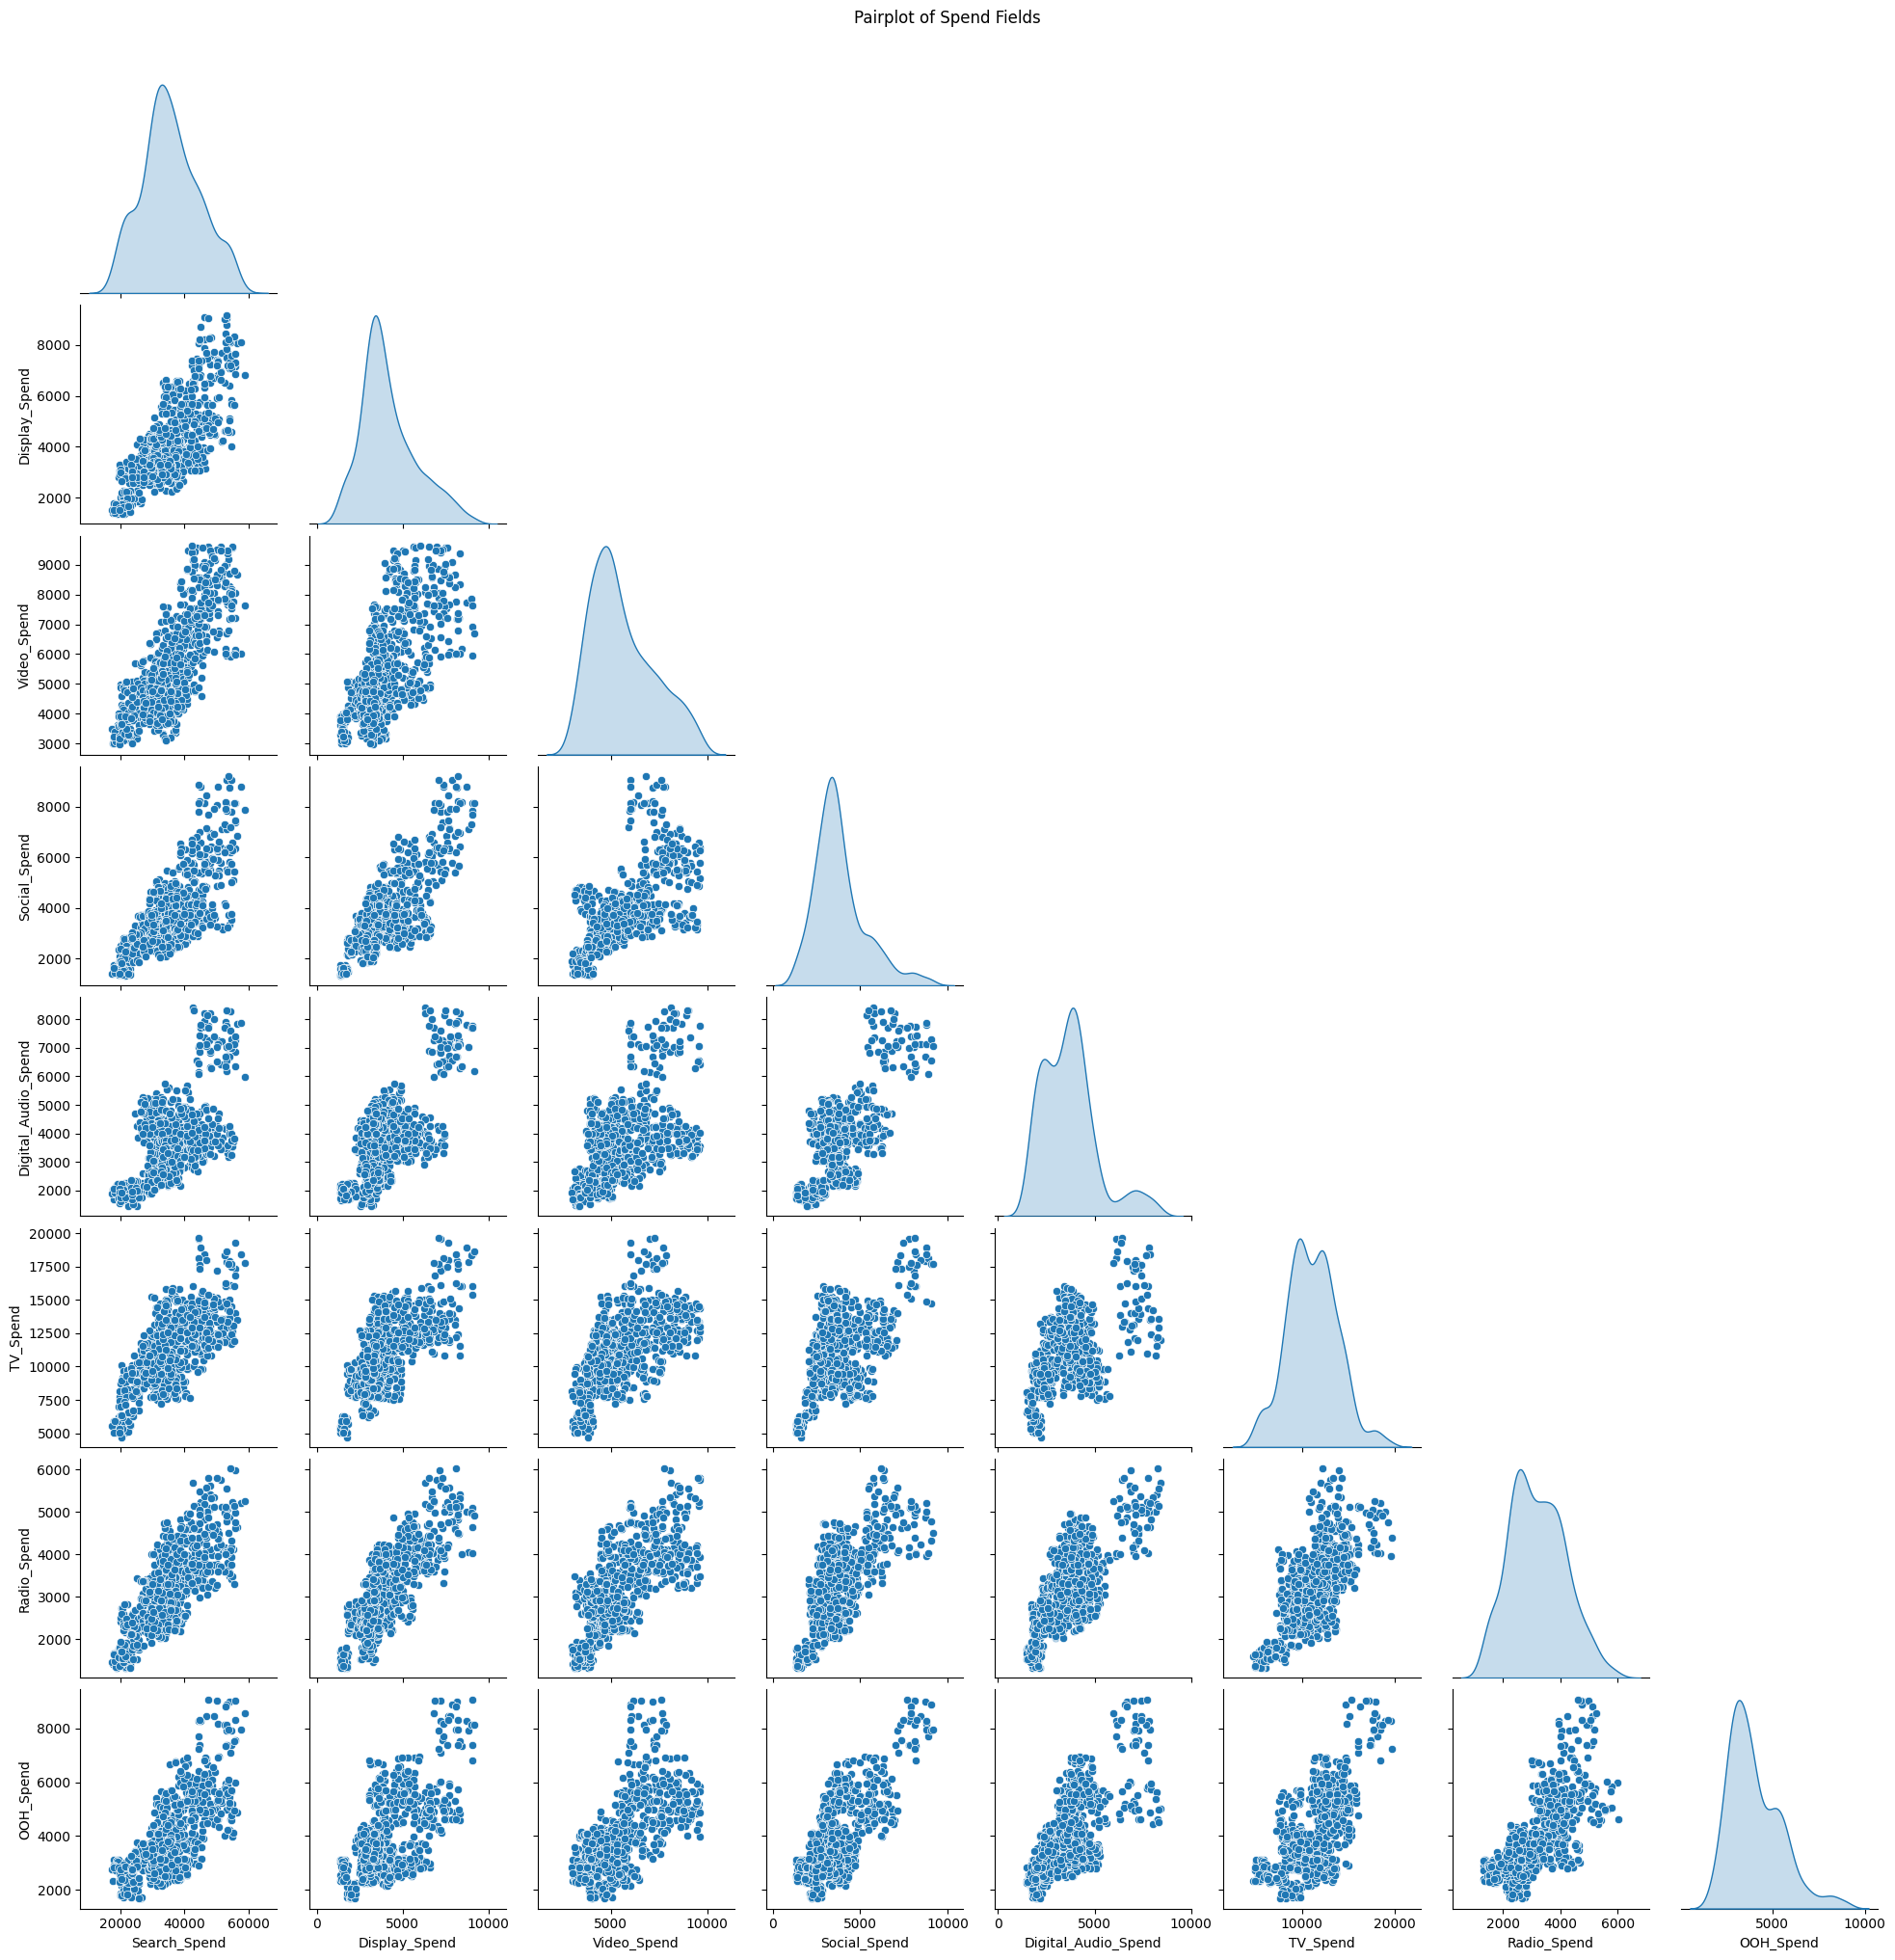

In [40]:
# Checking correlation & distribution

# Filter columns that contain 'Spend' in their names
spend_columns = [col for col in daily.columns if "Spend" in col]

# Create pairplot
sns.pairplot(daily[spend_columns], diag_kind="kde", corner=True, height=2.5)

# Show the plot
plt.suptitle("Pairplot of Spend Fields", y=1.02)
plt.show()

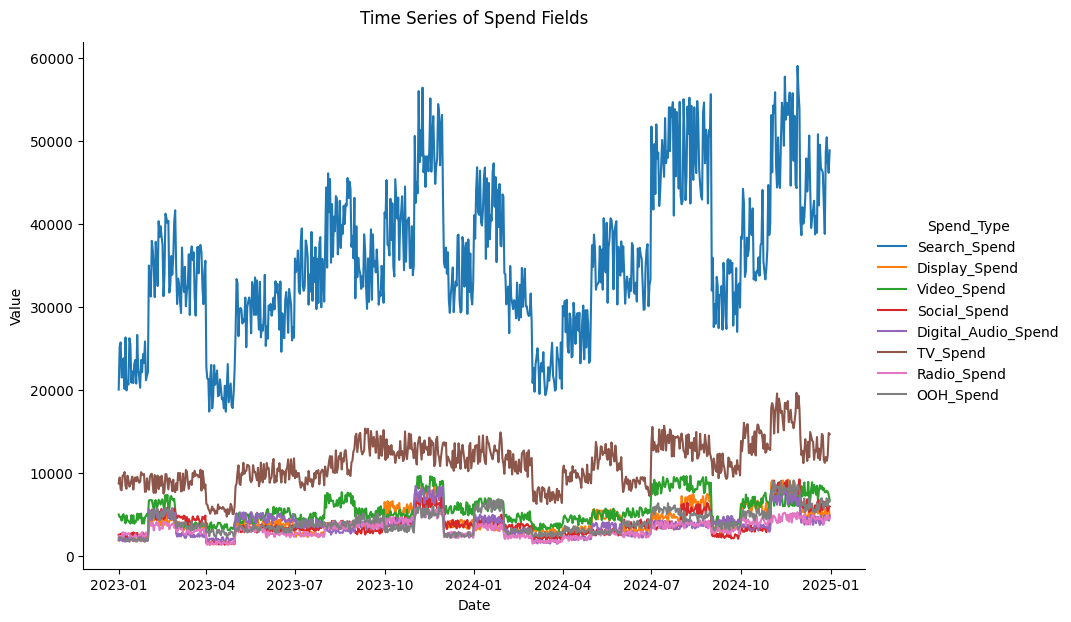

In [41]:
# Filter columns that include "Spend"
spend_columns = [col for col in daily.columns if "Spend" in col]

# Melt the DataFrame for Seaborn
daily_melted = daily.melt(id_vars="Date", value_vars=spend_columns, var_name="Spend_Type", value_name="Value")

# Plot each "Spend" field vs Date
sns.relplot(data=daily_melted, x="Date", y="Value", hue="Spend_Type", kind="line", height=6, aspect=1.5)

# Show the plot
plt.title("Time Series of Spend Fields", y=1.02)
plt.show()

## All Data Tables for MMM Work ##

In [33]:
# All tables that can be further used for MMM Building & Dashboarding for insights

external_factors.head() # Data for external trends such as inflation rate, CPI
spend_factors.head() # Data for coefficients for spend levels per marketing channel
factors.head() # concatenated table of both tables above
daily.head() # date-level data table containing all the data above with the spend levels

,Date,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,...,GRP_Factor,Search_Spend,Display_Spend,Video_Spend,Social_Spend,Digital_Audio_Spend,TV_Spend,Radio_Spend,OOH_Spend,Gross_Rating_Point
0,2023-01-01,1,2023,6,1.05,0,110.7,8.7,1741966,0.52,...,64,27649.923057,2322.439689,4173.676291,4650.923989,3369.804394,12294.947197,2110.970131,4485.401897,67.2
1,2023-01-02,1,2023,0,1.05,0,110.7,8.7,1741966,0.52,...,64,34801.338743,2504.560759,3113.013358,4161.962520,2722.924922,10977.789931,2178.581284,4885.147007,67.2
2,2023-01-03,1,2023,1,1.05,0,110.7,8.7,1741966,0.52,...,64,34001.447307,2524.467353,3348.967602,4139.547229,2873.650670,10188.806012,2454.262559,4291.741876,67.2
3,2023-01-04,1,2023,2,1.05,0,110.7,8.7,1741966,0.52,...,64,30935.586161,2279.550557,3423.887468,4579.677131,2675.582483,12595.869271,2169.224127,4234.710404,67.2
4,2023-01-05,1,2023,3,1.05,0,110.7,8.7,1741966,0.52,...,64,31569.314869,2138.869249,3700.542449,3750.840479,2842.232160,11761.514237,2578.760966,3818.479866,67.2
